In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
train=pd.read_csv('C:/Users/Jing/Downloads/train_sample.csv')

## Breakdown of the data and Columns
##### "TalkingData, China’s largest independent big data service platform, covers over 70% of active mobile devices nationwide. They handle 3 billion clicks per day, of which 90% are potentially fraudulent. Their current approach to prevent click fraud for app developers is to measure the journey of a user’s click across their portfolio, and flag IP addresses who produce lots of clicks, but never end up installing apps. With this information, they've built an IP blacklist and device blacklist.

##### While successful, they want to always be one step ahead of fraudsters and have turned to the Kaggle community for help in further developing their solution. In their 2nd competition with Kaggle, we’re challenged to build an algorithm that predicts whether a user will download an app after clicking a mobile app ad. To support our modeling, they have provided a generous dataset covering approximately 200 million clicks over 4 days!

##### The clicks that lead to download are considered Non-Fraudulent. So I may use the terms App Downloaded and Non-Fraudulent Clicks interchangeably."
### Columns breakdown
##### IP: ip address of the click
##### App: app id of the company
##### Device: device type id of user mobile phone (encoded)
##### OS: operating system, version id of user mobile phone (encoded)
##### Channel: Channel ID of mobile ad publisher (encoded)
##### Click_time: timestamp of the click on the ad (UTC)
##### Attributed_time: if the app is downloaded by user, this is the timestamp of that download
##### Is_attributed: target goal (completion) of download. Labeled at 0 and 1

In [3]:
train.loc[train.device==1]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,22491,9,1,15,127,2017-11-09 13:32:29,NaN,0
1,69407,15,1,13,386,2017-11-07 04:47:56,NaN,0
2,197179,3,1,13,280,2017-11-09 05:50:34,NaN,0
3,80416,12,1,19,219,2017-11-09 14:19:55,NaN,0
4,41313,18,1,35,107,2017-11-08 20:29:55,NaN,0
...,...,...,...,...,...,...,...,...
999995,17491,14,1,17,489,2017-11-07 04:40:21,NaN,0
999996,90891,15,1,41,245,2017-11-07 08:22:37,NaN,0
999997,73487,3,1,22,153,2017-11-07 16:04:31,NaN,0
999998,107759,3,1,13,19,2017-11-09 03:50:47,NaN,0


In [4]:
train.device.value_counts()

1       942994
2        43767
0         5633
3032      3607
3543      1465
         ...  
170          1
1193         1
2924         1
675          1
1534         1
Name: device, Length: 429, dtype: int64

In [5]:
# variables = ['ip', 'app', 'device', 'os', 'channel']
# for v in variables:
#     train[v] = train[v].astype('category')
#     train[v]=train[v].astype('category')

In [6]:
train['click_time'] = pd.to_datetime(train['click_time'])
train['click_time'] = pd.to_datetime(train['click_time'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ip               1000000 non-null  int64         
 1   app              1000000 non-null  int64         
 2   device           1000000 non-null  int64         
 3   os               1000000 non-null  int64         
 4   channel          1000000 non-null  int64         
 5   click_time       1000000 non-null  datetime64[ns]
 6   attributed_time  2527 non-null     object        
 7   is_attributed    1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 61.0+ MB


In [8]:
# Showing all the nulls for attributed_time
train.loc[train['attributed_time'].isna()]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,22491,9,1,15,127,2017-11-09 13:32:29,NaN,0
1,69407,15,1,13,386,2017-11-07 04:47:56,NaN,0
2,197179,3,1,13,280,2017-11-09 05:50:34,NaN,0
3,80416,12,1,19,219,2017-11-09 14:19:55,NaN,0
4,41313,18,1,35,107,2017-11-08 20:29:55,NaN,0
...,...,...,...,...,...,...,...,...
999995,17491,14,1,17,489,2017-11-07 04:40:21,NaN,0
999996,90891,15,1,41,245,2017-11-07 08:22:37,NaN,0
999997,73487,3,1,22,153,2017-11-07 16:04:31,NaN,0
999998,107759,3,1,13,19,2017-11-09 03:50:47,NaN,0


In [9]:
# Dropping attributed_time due to lack of information. Will just use is_attributed. 1 means downloaded apps. 0 mean not downloaded apps
train.loc[train['attributed_time'].notnull()]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
44,194792,19,0,29,213,2017-11-06 17:21:03,2017-11-06 17:23:22,1
725,108783,35,1,16,274,2017-11-08 02:41:50,2017-11-08 02:50:12,1
1533,28362,35,1,19,21,2017-11-09 01:25:47,2017-11-09 04:59:00,1
1563,261574,10,1,43,113,2017-11-08 12:10:03,2017-11-08 12:10:37,1
1619,327268,19,172,59,213,2017-11-09 02:37:59,2017-11-09 02:38:36,1
...,...,...,...,...,...,...,...,...
997113,150103,72,1,26,101,2017-11-07 03:38:44,2017-11-07 03:43:00,1
997133,207914,19,0,59,268,2017-11-07 00:50:25,2017-11-07 00:51:53,1
997980,221626,45,1,11,419,2017-11-08 04:35:08,2017-11-08 04:35:17,1
998950,98536,19,0,21,210,2017-11-08 06:39:21,2017-11-08 07:44:13,1


In [10]:
# 170 unique channels in this sample of 1 million clicks
train.channel.value_counts()

280    81598
245    47982
107    45640
477    38714
134    31825
       ...  
408        4
407        3
4          3
181        1
238        1
Name: channel, Length: 170, dtype: int64

In [11]:
train.describe()

,ip,app,device,os,channel,is_attributed
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000
mean,90829.918267,12.026138,21.384808,22.646242,268.60714,0.002527
std,69513.219607,14.888448,257.498929,55.080539,129.55709,0.050206
min,6.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,40123.000000,3.000000,1.000000,13.000000,140.00000,0.000000
50%,79474.000000,12.000000,1.000000,18.000000,258.00000,0.000000
75%,118247.000000,15.000000,1.000000,19.000000,379.00000,0.000000
max,364776.000000,743.000000,4179.000000,897.000000,498.00000,1.000000


In [12]:
channels = train.groupby(['channel'])

In [13]:
# Making a new dataframe with the channels groupedby
df = channels.count()

In [14]:
df.head(5)

,ip,app,device,os,click_time,attributed_time,is_attributed
channel,,,,,,,
0,10,10,10,10,10,1,10
3,4678,4678,4678,4678,4678,1,4678
4,3,3,3,3,3,1,3
5,49,49,49,49,49,31,49
13,598,598,598,598,598,0,598


In [15]:
df['fraud_rate'] = 1-(df.attributed_time/df.click_time)

In [16]:
df.reset_index(inplace=True)

In [17]:
df.head(5)

,channel,ip,app,device,os,click_time,attributed_time,is_attributed,fraud_rate
0,0,10,10,10,10,10,1,10,0.900000
1,3,4678,4678,4678,4678,4678,1,4678,0.999786
2,4,3,3,3,3,3,1,3,0.666667
3,5,49,49,49,49,49,31,49,0.367347
4,13,598,598,598,598,598,0,598,1.000000


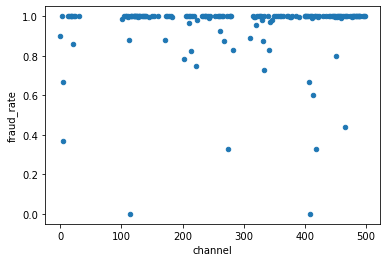

In [18]:
channel_plot = df.plot.scatter(x='channel', y='fraud_rate')

In [19]:
channel_device = train.groupby(['channel','device']).count()
df2 = channel_device
df2.reset_index(inplace=True)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   channel          1077 non-null   int64
 1   device           1077 non-null   int64
 2   ip               1077 non-null   int64
 3   app              1077 non-null   int64
 4   os               1077 non-null   int64
 5   click_time       1077 non-null   int64
 6   attributed_time  1077 non-null   int64
 7   is_attributed    1077 non-null   int64
dtypes: int64(8)
memory usage: 67.4 KB


In [23]:
train.device.value_counts()

1       942994
2        43767
0         5633
3032      3607
3543      1465
         ...  
170          1
1193         1
2924         1
675          1
1534         1
Name: device, Length: 429, dtype: int64

In [30]:
df3 = train.groupby(['channel','app']).count()

In [31]:
df3.set_index('app')

KeyError: "None of ['app'] are in the columns"

In [24]:
train.loc[train.channel==4]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
274461,83052,60,1,41,4,2017-11-07 14:34:34,NaN,0
285704,97421,60,1,19,4,2017-11-07 12:29:43,NaN,0
793709,46755,163,0,21,4,2017-11-07 10:13:16,2017-11-07 11:36:49,1
